## Amazon 평가 데이터에 대한 분석 및 시각화

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import warnings
from plotly.subplots import make_subplots
from scipy.stats import chi2_contingency
from itertools import combinations
%matplotlib inline

In [2]:
# Seaborn의 무한값 처리 경고 무시
warnings.filterwarnings("ignore", message="use_inf_as_na option is deprecated")

In [61]:
df = pd.read_csv('../input/amazon-sales-dataset/amazon.csv')
df.head(2)

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

## **데이터 전처리**

In [63]:
df.isnull().sum()/df.shape[0]*100

product_id             0.000000
product_name           0.000000
category               0.000000
discounted_price       0.000000
actual_price           0.000000
discount_percentage    0.000000
rating                 0.000000
rating_count           0.136519
about_product          0.000000
user_id                0.000000
user_name              0.000000
review_id              0.000000
review_title           0.000000
review_content         0.000000
img_link               0.000000
product_link           0.000000
dtype: float64

In [64]:
df.drop(['product_id','user_id','user_name','review_id','img_link','product_link'], axis=1, inplace=True)
df.head()

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."


In [65]:
df = df.dropna()

In [66]:
df['actual_price'] = df['actual_price'].str.replace('₹', '').str.replace(',', '')
df['actual_price'] = df['actual_price'].astype(float)

df['discounted_price'] = df['discounted_price'].str.replace('₹', '').str.replace(',', '')
df['discounted_price'] = df['discounted_price'].astype(float)

df['discount_percentage'] = df['discount_percentage'].str.replace('%', '')
df['discount_percentage'] = df['discount_percentage'].astype(int)

df['rating_count'] = df['rating_count'].str.replace(',', '')
df['rating_count'] = df['rating_count'].astype(int)

df['rating'] = df['rating'].replace('|', np.nan)
df['rating'] = df['rating'].astype(float)


df.head()

,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content
0,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,399.0,1099.0,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,199.0,349.0,43,4.0,43994,"Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...
2,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,199.0,1899.0,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a..."
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,329.0,699.0,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou..."
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,154.0,399.0,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th..."


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1463 entries, 0 to 1464
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_name         1463 non-null   object 
 1   category             1463 non-null   object 
 2   discounted_price     1463 non-null   float64
 3   actual_price         1463 non-null   float64
 4   discount_percentage  1463 non-null   int32  
 5   rating               1462 non-null   float64
 6   rating_count         1463 non-null   int32  
 7   about_product        1463 non-null   object 
 8   review_title         1463 non-null   object 
 9   review_content       1463 non-null   object 
dtypes: float64(3), int32(2), object(5)
memory usage: 114.3+ KB


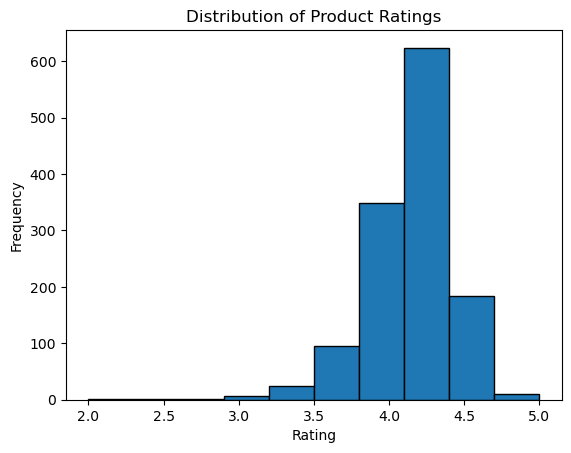

In [91]:
# 평점 분포 시각화

plt.hist(df['rating'].dropna(), bins=10, edgecolor='black')
plt.title('Distribution of Product Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

카테고리별 평균 평점 비교

In [92]:
# 카테고리별 평균 평점 계산
category_rating = df.groupby('category')['rating'].mean().sort_values(ascending=False)

# 상위 10개 카테고리의 평균 평점 시각화
category_rating.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Categories by Average Rating')
plt.xlabel('Average Rating')
plt.ylabel('Category')
plt.show()

KeyError: 'category'

할인율이 평점에 어떤 영향을 미치는지

In [ ]:
# 할인율과 평점의 상관 관계 분석
plt.scatter(df['discount_percentage'], df['rating'], alpha=0.5)
plt.title('Discount Percentage vs Rating')
plt.xlabel('Discount Percentage')
plt.ylabel('Rating')
plt.show()

리뷰 수가 많은 제품이 더 높은 평점을 받는지, 또는 리뷰 수가 적은 제품이 더 높은 평가를 받는지 분석

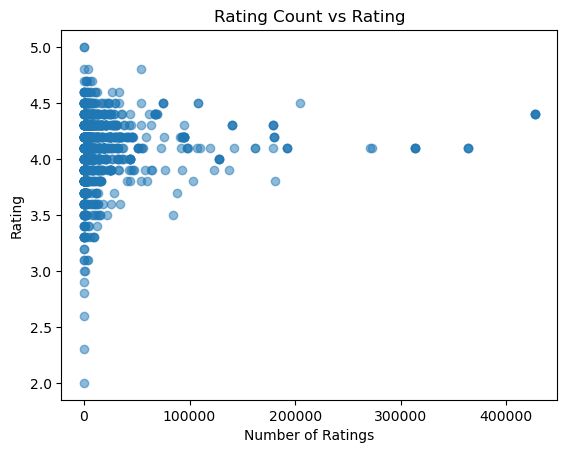

In [93]:
# 리뷰 수와 평점의 상관 관계 분석
plt.scatter(df['rating_count'], df['rating'], alpha=0.5)
plt.title('Rating Count vs Rating')
plt.xlabel('Number of Ratings')
plt.ylabel('Rating')
plt.show()

In [73]:
df_cat = df['category'].str.split('|', expand=True).rename(columns={0:'category_1', 1:'category_2', 2:'category_3', 3:'category_4',4:'category_5'})
 
df['category_1'] = df_cat['category_1']
df['category_2'] = df_cat['category_2']
df['category_3'] = df_cat['category_3']
df['category_4'] = df_cat['category_4']

df.drop('category', axis=1, inplace=True)
df.head()

,product_name,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,review_title,review_content,category_1,category_2,category_3,category_4
0,Wayona Nylon Braided USB to Lightning Fast Cha...,399.0,1099.0,64,4.2,24269,High Compatibility : Compatible With iPhone 12...,"Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
1,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,199.0,349.0,43,4.0,43994,"Compatible with all Type C enabled devices, be...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
2,Sounce Fast Phone Charging Cable & Data Sync U...,199.0,1899.0,90,3.9,7928,【 Fast Charger& Data Sync】-With built-in safet...,"Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
3,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,329.0,699.0,53,4.2,94363,The boAt Deuce USB 300 2 in 1 cable is compati...,"Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables
4,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,154.0,399.0,61,4.2,16905,[CHARGE & SYNC FUNCTION]- This cable comes wit...,"As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",Computers&Accessories,Accessories&Peripherals,Cables&Accessories,Cables


In [74]:
df.isnull().sum()

product_name             0
discounted_price         0
actual_price             0
discount_percentage      0
rating                   1
rating_count             0
about_product            0
review_title             0
review_content           0
category_1               0
category_2               0
category_3               8
category_4             165
dtype: int64

In [75]:
df=df.dropna()

In [76]:
df['Price']=df['discounted_price']*df['rating_count']
df['Price']

C:\Users\JWEI\AppData\Local\Temp\ipykernel_19788\2754739869.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Price']=df['discounted_price']*df['rating_count']


0        9683331.0
1        8754806.0
2        1577672.0
3       31045427.0
4        2603370.0
           ...    
1460      413110.0
1461     9389040.0
1462     1038492.0
1463    11235369.0
1464    20003781.0
Name: Price, Length: 1297, dtype: float64

In [77]:
result1 = df.groupby('category_3')['rating'].agg(['mean', 'min', 'max'])
result1['mean'] = result1['mean'].round(2)
result1

,mean,min,max
category_3,,,
Accessories,4.00,3.0,4.6
Adapters,4.15,4.0,4.3
AirConditioners,4.30,4.3,4.3
AirPurifiers,4.28,4.1,4.4
Audio&VideoAccessories,3.89,3.3,4.3
Cables&Accessories,4.15,3.3,5.0
Calculators,4.45,4.4,4.5
"Coffee,Tea&Espresso",4.01,3.3,4.5
Drawing&PaintingSupplies,4.30,4.3,4.3


최소 및 최대 평점에 대한 Plotting line

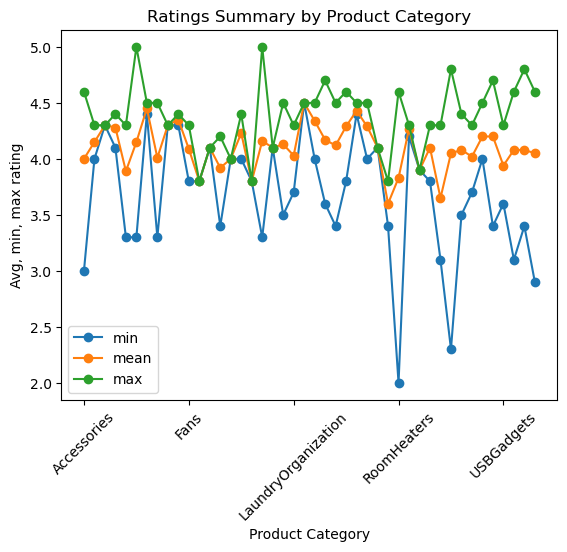

In [79]:
result1[['min', 'mean','max']].plot(kind='line', marker='o')

plt.title('Ratings Summary by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Avg, min, max rating')
plt.legend()
plt.xticks(rotation=45)

plt.show()

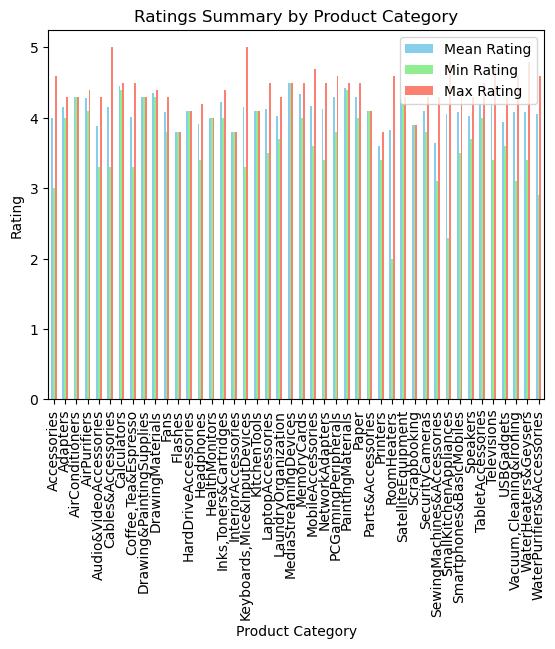

In [80]:
# 평균, 최소, 최대 평점을 위한 단일 막대 차트
result1.plot(kind='bar', color=['skyblue', 'lightgreen', 'salmon'])

plt.title('Ratings Summary by Product Category')
plt.xlabel('Product Category')
plt.ylabel('Rating')
plt.legend(['Mean Rating', 'Min Rating', 'Max Rating'])

plt.show()

In [81]:
result1 = df.groupby('category_3')['discount_percentage'].agg(['mean', 'min', 'max'])
result1['mean'] = result1['mean'].round(2)
result1

,mean,min,max
category_3,,,
Accessories,56.93,0,88
Adapters,78.50,63,94
AirConditioners,43.00,43,43
AirPurifiers,41.00,23,76
Audio&VideoAccessories,47.14,23,66
Cables&Accessories,59.57,0,90
Calculators,1.25,0,5
"Coffee,Tea&Espresso",41.93,17,60
Drawing&PaintingSupplies,0.00,0,0


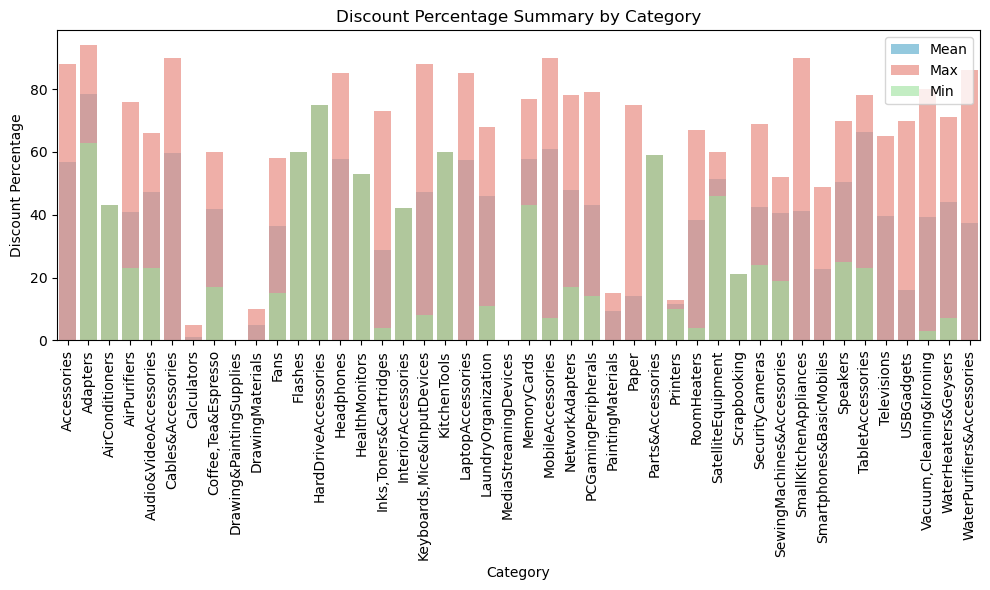

In [82]:
result1.reset_index(inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='category_3', y='mean', data=result1, color='skyblue', label='Mean')
sns.barplot(x='category_3', y='max', data=result1, color='salmon', alpha=0.7, label='Max')
sns.barplot(x='category_3', y='min', data=result1, color='lightgreen', alpha=0.6, label='Min')

plt.title('Discount Percentage Summary by Category')
plt.xlabel('Category')
plt.ylabel('Discount Percentage')
plt.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

C:\Users\JWEI\AppData\Local\Temp\ipykernel_19788\578240318.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='category_3', data=df, palette='viridis')


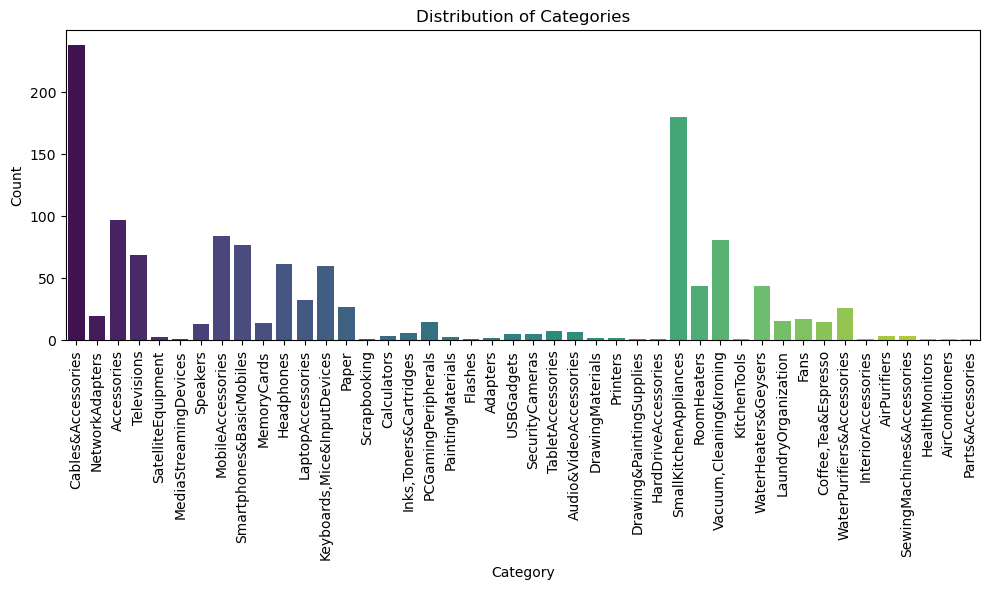

In [83]:
plt.figure(figsize=(10, 6))
sns.countplot(x='category_3', data=df, palette='viridis')
plt.title('Distribution of Categories')
plt.xlabel('Category')
plt.ylabel('Count')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()

In [84]:
x=df[['category_3','rating_count']]
xx = x.sort_values(by='rating_count', ascending=False)
xx.reset_index(inplace=True,drop=True)
xx.head(20)

,category_3,rating_count
0,Accessories,426973
1,Accessories,426973
2,Accessories,426973
3,Accessories,426972
4,Headphones,363713
5,Headphones,363713
6,Headphones,363711
7,Smartphones&BasicMobiles,313836
8,Smartphones&BasicMobiles,313836
9,Smartphones&BasicMobiles,313832


C:\Users\JWEI\AppData\Local\Temp\ipykernel_19788\734158274.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating_count', y='category_3', data=data1, palette='viridis',orient='h')


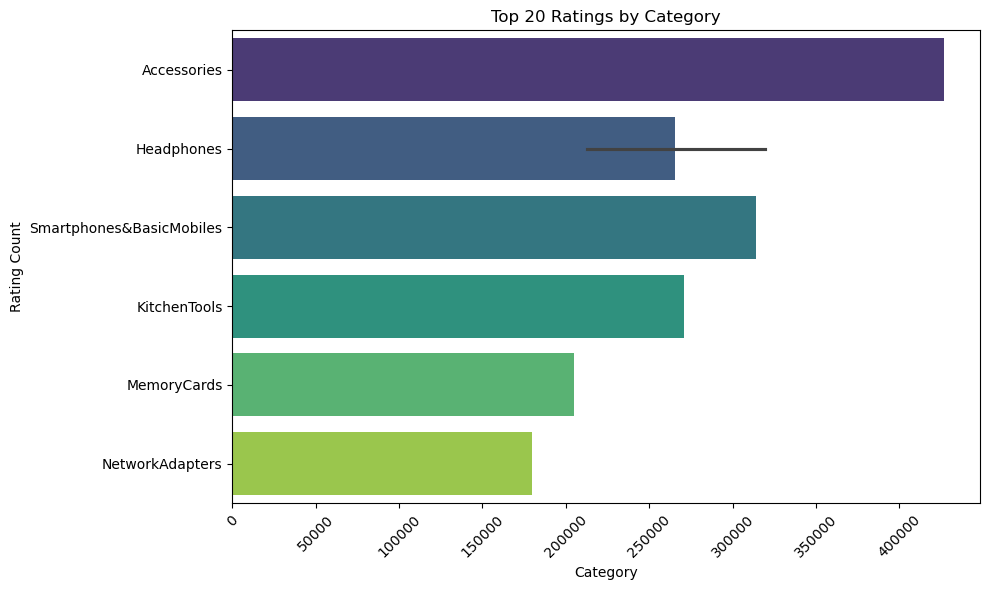

In [85]:
data1=xx.loc[0:19]
plt.figure(figsize=(10, 6))
sns.barplot(x='rating_count', y='category_3', data=data1, palette='viridis',orient='h')

plt.title('Top 20 Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating Count')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

In [86]:
x=df[['category_3','rating']]
xx = x.sort_values(by='rating', ascending=False)
xx.reset_index(inplace=True,drop=True)
xx.head(20)

,category_3,rating
0,Cables&Accessories,5.0
1,"Keyboards,Mice&InputDevices",5.0
2,SmallKitchenAppliances,4.8
3,WaterHeaters&Geysers,4.8
4,SmallKitchenAppliances,4.8
5,WaterHeaters&Geysers,4.7
6,SmallKitchenAppliances,4.7
7,Televisions,4.7
8,SmallKitchenAppliances,4.7
9,MobileAccessories,4.7


C:\Users\JWEI\AppData\Local\Temp\ipykernel_19788\235718113.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='rating', y='category_3', data=data2, palette='viridis',orient='h')


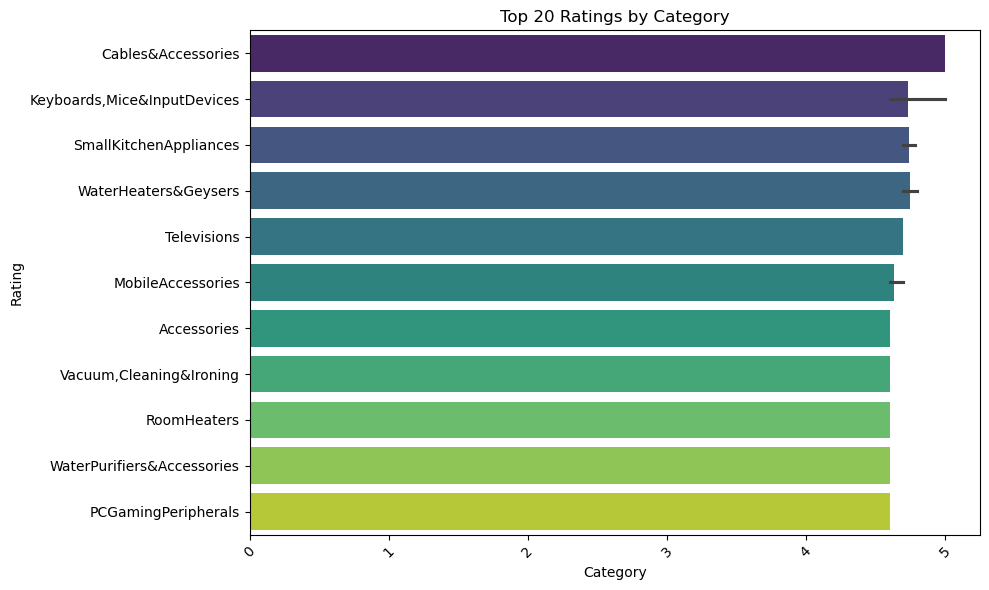

In [87]:
data2=xx.loc[0:20]

plt.figure(figsize=(10, 6))
sns.barplot(x='rating', y='category_3', data=data2, palette='viridis',orient='h')

plt.title('Top 20 Ratings by Category')
plt.xlabel('Category')
plt.ylabel('Rating')

plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


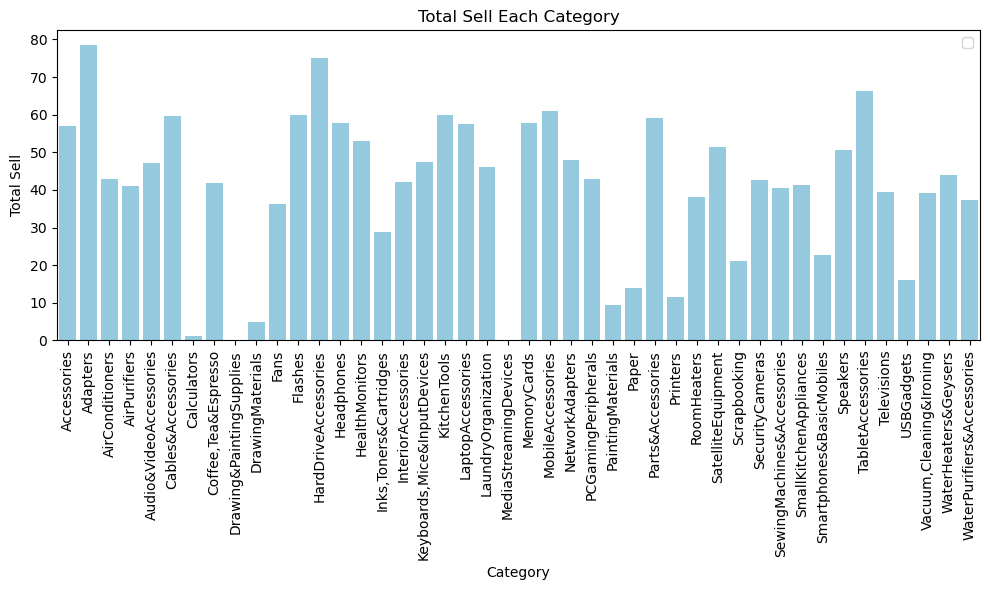

In [88]:
result1.reset_index(inplace=True)

plt.figure(figsize=(10, 6))
sns.barplot(x='category_3', y='mean', data=result1, color='skyblue')

plt.title('Total Sell Each Category')
plt.xlabel('Category')
plt.ylabel('Total Sell')
plt.legend()

plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

In [89]:
result1 = df.groupby('category_3')['Price'].agg(['mean', 'min'])
result1['mean'] = result1['mean'].round(2)
result1

,mean,min
category_3,,
Accessories,7.353092e+06,4625.0
Adapters,7.653520e+05,229460.0
AirConditioners,1.389007e+08,138900690.0
AirPurifiers,4.039344e+07,29374974.0
Audio&VideoAccessories,1.291439e+07,557996.0
Cables&Accessories,4.999563e+06,1995.0
Calculators,4.993237e+06,2367910.0
"Coffee,Tea&Espresso",2.013796e+06,42365.0
Drawing&PaintingSupplies,2.380050e+06,2380050.0


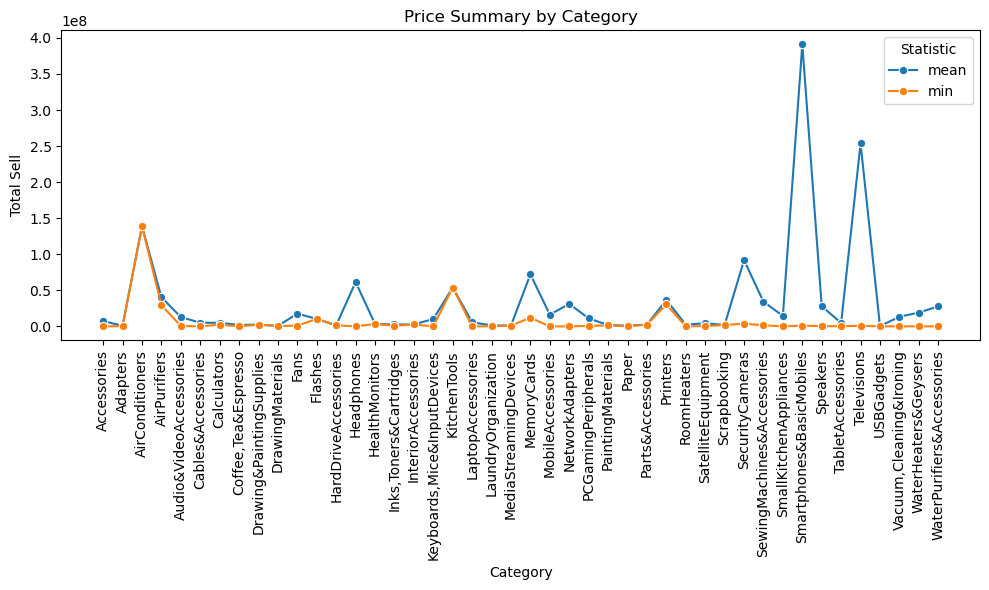

In [90]:
result1.reset_index(inplace=True)

result_melted = result1.melt(id_vars='category_3', var_name='Stat', value_name='Price')

plt.figure(figsize=(10, 6))
sns.lineplot(x='category_3', y='Price', hue='Stat', data=result_melted, marker='o')

plt.title('Price Summary by Category')
plt.xlabel('Category')
plt.ylabel('Total Sell')
plt.legend(title='Statistic')

plt.xticks(rotation=90)

plt.tight_layout()
plt.show()